توجه: فقط قسمت های خواسته شده را تکمیل کنید و همراه فایل خود مدل آموزش دیده را ارسال کنید.

هدف این تمرین :


1.   ساخت دیتاست مورد نیاز و نوشتن کلاس دیتاست
2.   Augmentation
3.   نوشتن مدل دسته بندی 3 کلاسه با استفاده از چند کلاس پایتون



**Hesam Hosseini**

**400101034**

In [ ]:
## download data
%%capture

!wget http://data.csail.mit.edu/places/ADEchallenge/release_test.zip
!wget http://data.csail.mit.edu/places/ADEchallenge/ADEChallengeData2016.zip
!unzip ADEChallengeData2016.zip
!unzip release_test.zip
!pip install mmengine

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import glob

from cv2 import imread as IM
from os import path

from torch.utils.data import Dataset
import torchvision.transforms as v2
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import random
from torch.utils.data import random_split
import torchvision.transforms.functional as TF
from random import randint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Data Generation

در این قسمت برای ساخت دیتاست مورد نیاز باید از هر تصویر دانلود شده ،2 تصویر یکی بدون تغییر و دیگری تغییر یافته به سایز 224 در 224 تولید کنید .به این منظور ابتداتابع های 1تا 6 را کامل کرده و سپس از تابع های 1تا3 برای ساخت تصویر تغییر یافته استفاده کنید.توجه داشته باشید که در تصاویر تولیدی تعدادی فقط یک تغییر و تعدادی دو و سه تغییر را باید داشته باشند،همچنین در تصاویر تولید شده نباید قسمت مشکی ناشی از چرخش وجود داشته باشد




*https://pytorch.org/vision/main/generated/torchvision.transforms.RandomAffine.html#torchvision.transforms.RandomAffine*

In [ ]:
# function 1
# def displacement(img):
#   ## To Do
#   x = np.random.randint(0, img.shape[1]//2)
#   y = np.random.randint(0,img.shape[2]//2)
#   # displacement_transfomer = v2.RandomAffine(degrees=0, translate=(0.5, 0.5), scale=(1,1))
#   # displacement_transfomer = v2.RandomCrop(size=(img.shape[1]//2, (img.shape[2]//2)))
#   # re = v2.Resize(size=(img.shape[1],img.shape[2]))
#   return TF.crop(img,top=x,left=y,height=img.shape[1]//2,width=img.shape[2]//2)
#   # return (displacement_transfomer(img))
#   # return TF.affine(img, angle=0, translate=(dx, dy), scale=1, shear=0)

# # function 2
# def rotation(img):
#     ## To Do
#   # angle = np.random.randint(-30, 30)
#   # return TF.affine(img, angle=angle, translate=(0, 0), scale=1, shear=0)
#   rotation_transfomer = v2.RandomRotation(degrees=(-90,90))
#   crop = v2.CenterCrop(size=(img.shape[1]//2, img.shape[2]//2))
#   # re = v2.Resize(size=(img.shape[1],img.shape[2]))
#   return (crop(rotation_transfomer(img)))
def displacement(img):
    img = img.numpy().transpose(1,2,0)
    M = np.float32([[1, 0, np.random.randint(30,80)], [0, 1, np.random.randint(30,80)]])
    img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]),borderMode=cv2.BORDER_REFLECT)
    img = torch.tensor(img.transpose(2,0,1))
    return img

# function 2
def rotation(img):

    img = img.numpy().transpose(1,2,0)
    angle = np.random.randint(-40, 40)
    rotation_matrix = cv2.getRotationMatrix2D((img.shape[1]//2 , img.shape[0]//2), angle, 1)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (img.shape[1] , img.shape[0]),borderMode=cv2.BORDER_REFLECT)
    return torch.from_numpy(rotated_img.transpose(2,0,1))

# function 3
def scaling(img):
  ## To Do
  displacement_transfomer = v2.RandomAffine(degrees=0,scale=(1,4))
  return displacement_transfomer(img)


# function 4
def Brightness(img):  ## for augmentation
  ## To Do
  factor = np.random.uniform(0.5, 1.5)
  return TF.adjust_brightness(img, factor)



# function 5
def bluring(img):# for augmentation
  ## To Do
  blurrer = v2.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.))
  return blurrer(img)

# function 6
def gaussian_noise(img):#for augmentation
  ## To Do
    std = 15
    ty = img.dtype
    img = img.type(torch.float64)
    noise = img + torch.rand_like(img) * std
    return noise.type(ty)





In [ ]:
def plot_tensor(img,label=None):
  if len(img.shape)>3:
      fig,axes = plt.subplots(nrows=1, ncols=img.shape[0],figsize=(20, 20))
      for i,ax in enumerate(axes):
        sel_img = img[i].numpy().transpose(1, 2, 0)
        ax.imshow(sel_img)
        ax.axis("off")
        if label is not None:
          ax.set_title(label[i])
  else:
    img = img.numpy().transpose(1, 2, 0)
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(6, 8))
    ax.imshow(img)
    ax.axis("off")

# ax = fig.add_subplot(111, projection='3d')


### test functions:

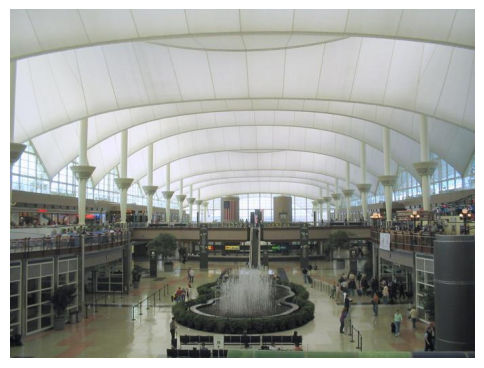

In [ ]:
# num = np.random.randint(1)
from PIL import Image
img_test = Image.open(f'/content/ADEChallengeData2016/images/training/ADE_train_00000001.jpg')
transform = v2.Compose([
    v2.PILToTensor()
])

img_test = transform(img_test)
plot_tensor(img_test)

In [ ]:
img_test.shape

torch.Size([3, 512, 683])

In [ ]:
displacement(img_test).shape

torch.Size([3, 512, 683])

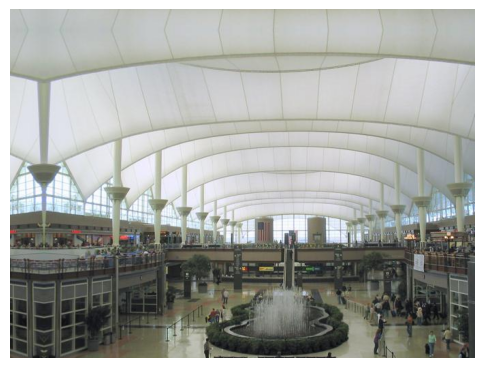

In [ ]:
plot_tensor(displacement(img_test))

In [ ]:
rotation(img_test).shape

torch.Size([3, 512, 683])

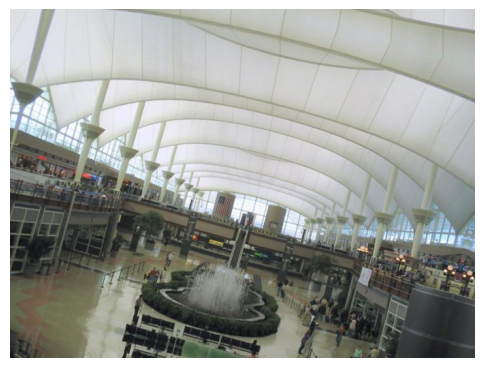

In [ ]:
plot_tensor(rotation(img_test))

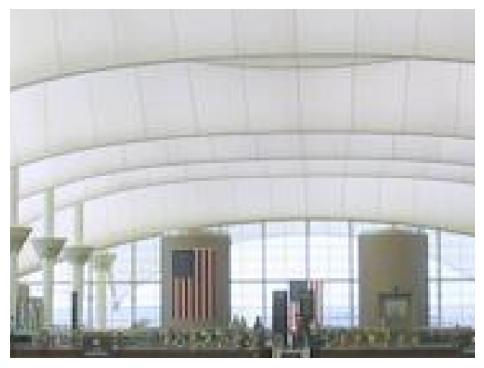

In [ ]:
plot_tensor(scaling(img_test))

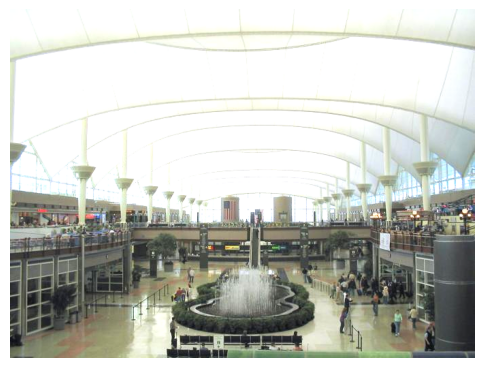

In [ ]:
plot_tensor(Brightness(img_test))

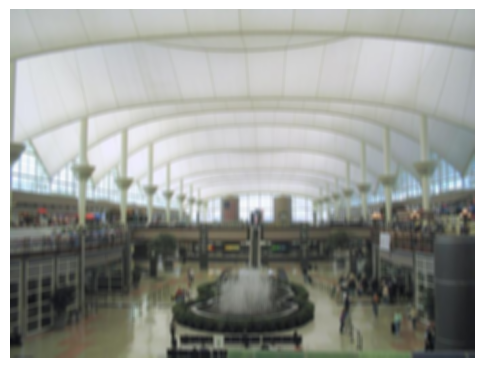

In [ ]:
plot_tensor(bluring(img_test))

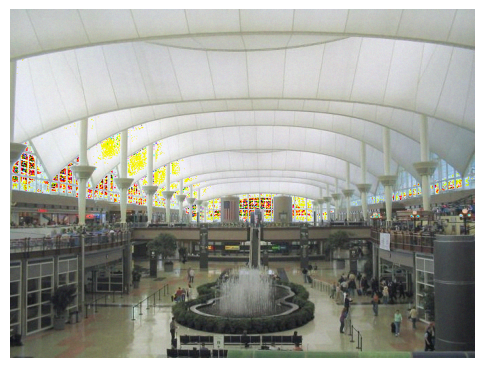

In [ ]:
plot_tensor(gaussian_noise(img_test))

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = os.listdir(data_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.images[idx])
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        if image.shape[0] == 1:
            image = image.expand(3,-1,-1)
        tran_img,label = self.apply_transforms(image)
        # image = v2.CenterCrop(size=(image.shape[1]//2, image.shape[2]//2))(image)
        return v2.Resize((224,224),antialias=True)(image),v2.Resize((224,224),antialias=True)(tran_img),label

    def apply_transforms(self, img):
        img_copy = img.clone()
        # Randomly apply transformation functions 1 to 3
        transforms = [displacement, rotation, scaling]
        num_transforms = np.random.randint(1, 3)  # Apply 1 to 2 transformations
        label = torch.zeros(3,device = img.device)
        re = True
        for _ in range(num_transforms):
            trn_num = np.random.randint(0,3)
            # transform_func = np.random.choice(transforms)
            label[trn_num] = 1
            transform_func = transforms[trn_num]
            img_copy = transform_func(img_copy)

        return img_copy,label

In [ ]:
transform_orig = v2.Compose([
    v2.PILToTensor(),
])
transforms = v2.Compose([
    v2.PILToTensor(),
    # v2.Resize((224,224)),
    Brightness,
    bluring,
    gaussian_noise,
])

original = CustomDataset('/content/ADEChallengeData2016/images/training',transform=transform_orig)## To Do
transformed_dataset = CustomDataset('/content/ADEChallengeData2016/images/training',transform=transforms)## To Do
dataset_train = torch.utils.data.ConcatDataset([transformed_dataset,original])
dataset_test = CustomDataset('/content/release_test/testing',transform=transform_orig)## To Do
dataset_val = CustomDataset('/content/ADEChallengeData2016/images/validation',transform=transform_orig)## To Do

len_ = len(dataset_train)

dataset_train = torch.utils.data.Subset(dataset_train, [i for i in range(2**12)]+[len_-1-i for i in range(2**12)]) # 8192 includes some of agumented images and some of noraml images
# dataset_train = .data.Subset(dataset_train, [i for i in range(2)])
train_loader = DataLoader(dataset_train,batch_size=16, shuffle=True)## To Do
test_loader= DataLoader(dataset_test,batch_size=16, shuffle=True)## To Do
val_loader = DataLoader(dataset_val,batch_size=16, shuffle=True)## To Do


In [ ]:
len(dataset_train)

8192

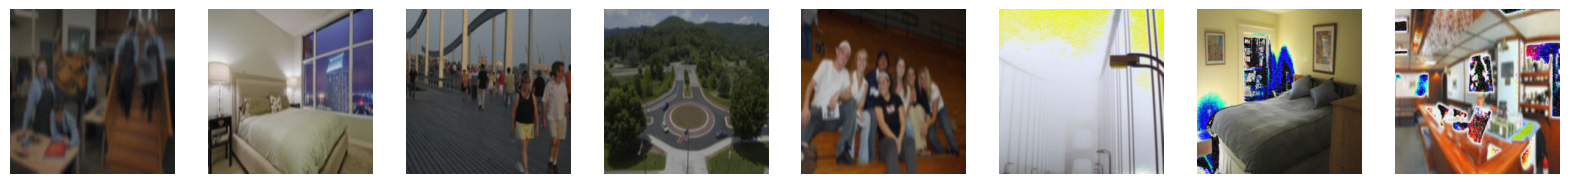

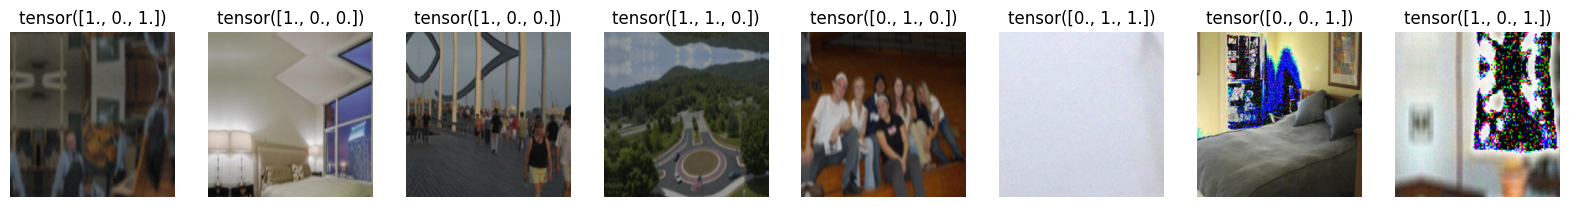

In [ ]:
## To Do  : show 8 images from train_loader & 8 images from test_loader
sample,trans,label = next(iter(train_loader))
selected = []
while len(selected)!=8:
  i = np.random.randint(1,16)
  if i not in selected:
    selected.append(i)
plot_tensor(sample[selected])
plot_tensor(trans[selected],label=label[selected])


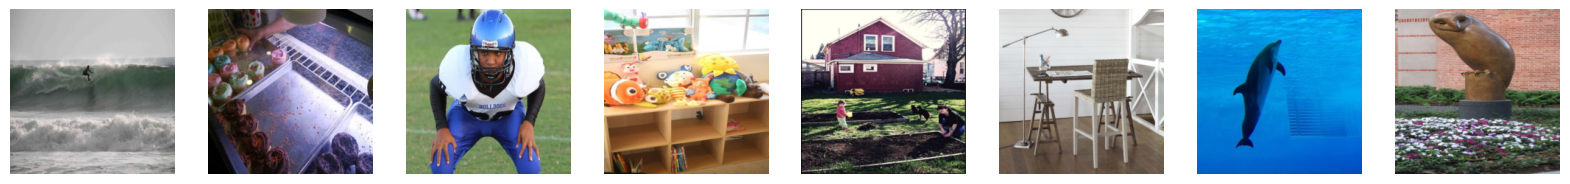

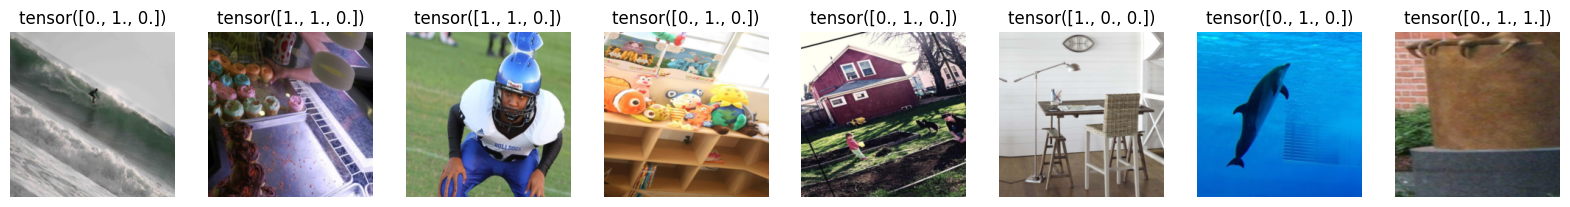

In [ ]:
sample,trans,label = next(iter(test_loader))
selected = []
while len(selected)!=8:
  i = np.random.randint(1,16)
  if i not in selected:
    selected.append(i)
plot_tensor(sample[selected])
plot_tensor(trans[selected],label=label[selected])

##Model

در این قسمت میخواهیم یک مدل 3 کلاسه  مطبق شکل زیرکه شامل قسمت های زیر میشود را آموزش دهیم.

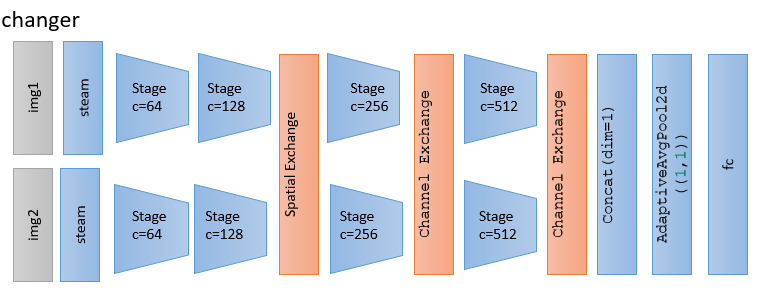

دو کلاس



1.   SpatialExchange
2.   ChannelExchange


 .مطابق شکل زیر ویژگی های دو تصویر را با هم عوض میکنند.


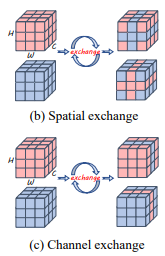

In [ ]:
## dont change this block

from mmengine.model import BaseModule
class ChannelExchange(BaseModule):
    """
    channel exchange
    Args:
        p (float, optional): p of the features will be exchanged.
            Defaults to 1/2.
    """
    def __init__(self, p=1/2):
        super().__init__()
        assert p >= 0 and p <= 1
        self.p = int(1/p)

    def forward(self, x1, x2):
        N, c, h, w = x1.shape

        exchange_map = torch.arange(c) % self.p == 0
        exchange_mask = exchange_map.unsqueeze(0).expand((N, -1))

        out_x1, out_x2 = torch.zeros_like(x1), torch.zeros_like(x2)
        out_x1[~exchange_mask, ...] = x1[~exchange_mask, ...]
        out_x2[~exchange_mask, ...] = x2[~exchange_mask, ...]
        out_x1[exchange_mask, ...] = x2[exchange_mask, ...]
        out_x2[exchange_mask, ...] = x1[exchange_mask, ...]

        return out_x1, out_x2



class SpatialExchange(BaseModule):
    """
    spatial exchange
    Args:
        p (float, optional): p of the features will be exchanged.
            Defaults to 1/2.
    """
    def __init__(self, p=1/2):
        super().__init__()
        assert p >= 0 and p <= 1
        self.p = int(1/p)

    def forward(self, x1, x2):
        N, c, h, w = x1.shape
        exchange_mask = torch.arange(w) % self.p == 0

        out_x1, out_x2 = torch.zeros_like(x1), torch.zeros_like(x2)
        out_x1[..., ~exchange_mask] = x1[..., ~exchange_mask]
        out_x2[..., ~exchange_mask] = x2[..., ~exchange_mask]
        out_x1[..., exchange_mask] = x2[..., exchange_mask]
        out_x2[..., exchange_mask] = x1[..., exchange_mask]

        return out_x1, out_x2

شبکه ی زیر را پیاده کنید  

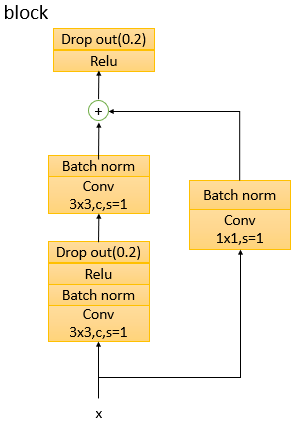

سوال تئوری1:
1.  مقادیر زیر را برای لایه های کانولوشن چه قدر در نظر گرفته اید؟
 channel out size (conv(1*1))
 padding(conv)
2.  دلیل استفاده از کانولوشن 1در1 چیست؟





In [ ]:
##To Do
class block(nn.Module):
  def __init__(self,in_channels, out_channels):
    super(block,self).__init__()
    self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3,padding=1)
    self.batchnorm1 = nn.BatchNorm2d(out_channels)
    self.dropout = nn.Dropout2d(p=0.2)
    self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,padding=1)
    self.batchnorm2 = nn.BatchNorm2d(out_channels)
    self.relu = nn.ReLU()

    self.conv_res = nn.Conv2d(in_channels, out_channels, kernel_size=1)
    self.batchnorm_res = nn.BatchNorm2d(out_channels)


  def forward(self,x):
    out = self.conv1(x)
    out = self.batchnorm1(out)
    out = self.relu(out)
    out = self.dropout(out)
    out = self.conv2(out)
    out = self.batchnorm2(out)

    out_skip = self.conv_res(x)
    out_skip = self.batchnorm_res(out_skip)

    out = out + out_skip

    return out

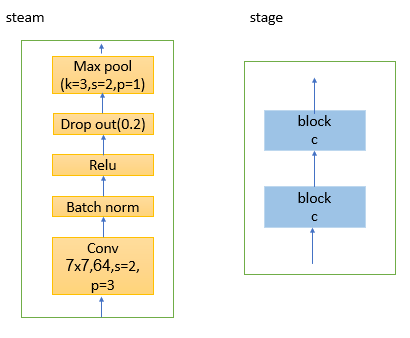

با استفاده از تصاویر مدل ،کلاس زیر را تکمیل کنید.

In [ ]:
#To Do
class changer(nn.Module):
  def __init__(self,block,SpatialExchange,ChannelExchange,in_channels):
    super(changer,self).__init__()
    self.in_channels = in_channels
    self.SpatialExchange = SpatialExchange()
    self.ChannelExchange = ChannelExchange()
    self.block = block
    self.steam=nn.Sequential(
        nn.Conv2d(in_channels, 64, kernel_size=7,padding=3,stride=2),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.Dropout2d(p=0.2),
        nn.MaxPool2d(kernel_size=3,padding=1,stride=2)
        )

    self.stage1 = self._make_stage(64,128)
    self.stage2 = self._make_stage(128,256)
    self.stage3 = self._make_stage(256,512)
    self.stage4 = self._make_stage(512,512)

    self.AdaptiveAvgPool2d = nn.AdaptiveAvgPool2d((1,1))
    self.fc = nn.Linear(1024, 3)
    self.flatten = nn.Flatten()
    self.activation = nn.Sigmoid()





  def _make_stage(self,in_channels,out_channels):

    layers=[self.block(in_channels,in_channels),self.block(in_channels,out_channels)]

    return nn.Sequential(*layers)




  def forward(self,x1,x2):

    out1 = self.steam(x1)
    out1 = self.stage1(out1)

    out1 = self.stage2(out1)
    out2 = self.steam(x2)
    out2 = self.stage1(out2)
    out2 = self.stage2(out2)

    out1,out2 = self.SpatialExchange(out1,out2)

    out1 = self.stage3(out1)
    out2 = self.stage3(out2)

    out1 ,out2 = self.ChannelExchange(out1,out2)

    out1 = self.stage4(out1)
    out2 = self.stage4(out2)

    out = torch.concat([out1,out2],dim=1)

    out = self.AdaptiveAvgPool2d(out)

    out = self.flatten(out)

    out = self.fc(out)

    out = self.activation(out)

    return out

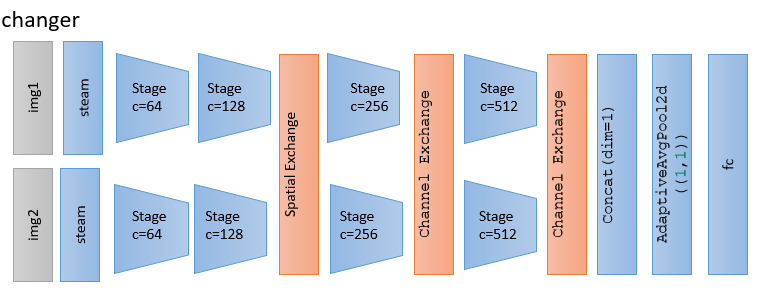

In [ ]:
## To Do
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model=changer(block,SpatialExchange,ChannelExchange,3).to(device)

criterion = torch.nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

##Train & validation


In [ ]:
int(1==0)

0

In [25]:
def log(phase,acc_dis, acc_rot, acc_scale,loss):
  print(f'loss_{phase} ={loss:.3f},acc_dis={acc_dis:.3f}, acc_rot={acc_rot:.3f},  acc_scale={acc_scale:.3f}')

from tqdm import tqdm
import copy
Loss_train=[]
acc_train_dis = []
acc_train_rot = []
acc_train_scale = []


Loss_val=[]
acc_val_dis = []
acc_val_rot = []
acc_val_scale = []

best_loss = np.inf

num_epochs = 10
# [displacement, rotation, scaling]
for epoch in range(num_epochs):
    num_correct_train = 0
    num_correct_dis_train = 0
    num_correct_rot_tain = 0
    num_correct_scale_train = 0
    running_loss = 0
    total = 0


    model.train()
    corr_train = 0
    for inputs, trans, targets in tqdm(train_loader):
        inputs = inputs.to(device).float()
        trans = trans.to(device).float()
        targets = targets.to(device).float()
        optimizer.zero_grad()
        outputs = model(inputs,trans)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss+= loss.item()
        predicted = (outputs > 0.5).float()
        # num_correct_train+= (predicted==targets).all(dim=1).int().sum().item()
        # print(num_correct_train)
        num_correct_dis_train += (predicted[:,0]==targets[:,0]).int().sum().item()
        # print(num_correct_dis_train)
        num_correct_rot_tain += (predicted[:,1]==targets[:,1]).int().sum().item()
        num_correct_scale_train +=  (predicted[:,2]==targets[:,2]).int().sum().item()
        total += inputs.size(0)

    log('Train',num_correct_dis_train/total, num_correct_rot_tain/total, num_correct_scale_train/total,running_loss/len(train_loader))
    # log('Train',acc_train_dis[epoch],  acc_train_rot[epoch], acc_train_scale[epoch],Loss_train[epoch])
    Loss_train.append(running_loss/len(train_loader))
    acc_train_dis.append(num_correct_dis_train/total)
    acc_train_rot.append(num_correct_rot_tain/total)
    acc_train_scale.append(num_correct_scale_train/total)
    # acc_train.append(num_correct_train/total)

    model.eval()
    corr_val = 0
    num_correct_val = 0
    num_correct_dis_val = 0
    num_correct_rot_val = 0
    num_correct_scale_val = 0
    running_loss = 0
    total = 0
    with torch.no_grad():
        for inputs, trans, targets in val_loader:
            inputs = inputs.to(device).float()
            trans = trans.to(device).float()
            targets = targets.to(device).float()
            outputs = model(inputs,trans)
            loss = criterion(outputs, targets)
            running_loss+= loss.item()
            predicted = (outputs > 0.5).float()
            # num_correct_val += (predicted==targets).all(dim=1).int().sum().item()
            num_correct_dis_val += (predicted[:,0]==targets[:,0]).int().sum().item()
            num_correct_rot_val += (predicted[:,1]==targets[:,1]).int().sum().item()
            num_correct_scale_val +=  (predicted[:,2]==targets[:,2]).int().sum().item()
            total += inputs.size(0)
    epoch_loss = running_loss/len(val_loader)
    if epoch_loss < best_loss:
      print("saving best model")
      best_loss = epoch_loss
      best_model_wts = copy.deepcopy(model.state_dict())
    log('val',num_correct_dis_val/total, num_correct_rot_val/total, num_correct_scale_val/total,epoch_loss)
    # log('val',acc_val_dis[epoch],  acc_val_rot[epoch], acc_val_scale[epoch],Loss_val[epoch])

    Loss_val.append(epoch_loss)
    acc_val_dis.append(num_correct_dis_val/total)
    acc_val_rot.append(num_correct_rot_val/total)
    acc_val_scale.append(num_correct_scale_val/total)
    # acc_val.append(num_correct_val/total)


    # print(f'Epoch {epoch+1} loss_TRAIN ={Loss_train[epoch]:.3f}, acc_train={(corr_train/len(train_loader))} loss_val= {Loss_val[epoch]:.3f}')
    # print(f'loss_TRAIN ={sum(oss_train):.3f},acc_train={(num_correct_train/len(train_loader))} acc_dis={(num_correct_dis_train/len(train_loader))}, acc_rot={(num_correct_rot_tain/len(train_loader))},  acc_scale={(num_correct_scal_train/len(train_loader))} ,\t loss_val= {sum(Loss_val):.3f}, acc_val={(num_correct_val/len(val_loader))}')



100%|██████████| 512/512 [16:31<00:00,  1.94s/it]


loss_Train =0.701,acc_dis=0.533, acc_rot=0.535,  acc_scale=0.574
saving best model
loss_val =0.681,acc_dis=0.521, acc_rot=0.564,  acc_scale=0.635


100%|██████████| 512/512 [16:21<00:00,  1.92s/it]


loss_Train =0.669,acc_dis=0.548, acc_rot=0.587,  acc_scale=0.633
saving best model
loss_val =0.665,acc_dis=0.565, acc_rot=0.568,  acc_scale=0.636


100%|██████████| 512/512 [16:22<00:00,  1.92s/it]


loss_Train =0.663,acc_dis=0.532, acc_rot=0.596,  acc_scale=0.653
loss_val =0.675,acc_dis=0.505, acc_rot=0.585,  acc_scale=0.619


100%|██████████| 512/512 [16:35<00:00,  1.94s/it]


loss_Train =0.663,acc_dis=0.542, acc_rot=0.587,  acc_scale=0.644
loss_val =0.672,acc_dis=0.541, acc_rot=0.570,  acc_scale=0.620


100%|██████████| 512/512 [16:26<00:00,  1.93s/it]


loss_Train =0.657,acc_dis=0.553, acc_rot=0.602,  acc_scale=0.652
saving best model
loss_val =0.659,acc_dis=0.550, acc_rot=0.588,  acc_scale=0.654


100%|██████████| 512/512 [16:19<00:00,  1.91s/it]


loss_Train =0.656,acc_dis=0.567, acc_rot=0.606,  acc_scale=0.651
saving best model
loss_val =0.643,acc_dis=0.597, acc_rot=0.599,  acc_scale=0.664


100%|██████████| 512/512 [16:17<00:00,  1.91s/it]


loss_Train =0.622,acc_dis=0.653, acc_rot=0.627,  acc_scale=0.678
saving best model
loss_val =0.585,acc_dis=0.702, acc_rot=0.634,  acc_scale=0.723


100%|██████████| 512/512 [16:18<00:00,  1.91s/it]


loss_Train =0.596,acc_dis=0.699, acc_rot=0.641,  acc_scale=0.687
loss_val =0.750,acc_dis=0.551, acc_rot=0.653,  acc_scale=0.646


100%|██████████| 512/512 [16:27<00:00,  1.93s/it]


loss_Train =0.596,acc_dis=0.701, acc_rot=0.633,  acc_scale=0.686
saving best model
loss_val =0.565,acc_dis=0.738, acc_rot=0.666,  acc_scale=0.708


100%|██████████| 512/512 [16:25<00:00,  1.93s/it]


loss_Train =0.579,acc_dis=0.723, acc_rot=0.650,  acc_scale=0.701
loss_val =0.578,acc_dis=0.724, acc_rot=0.682,  acc_scale=0.720


Text(0.5, 80.7222222222222, 'Epoch')

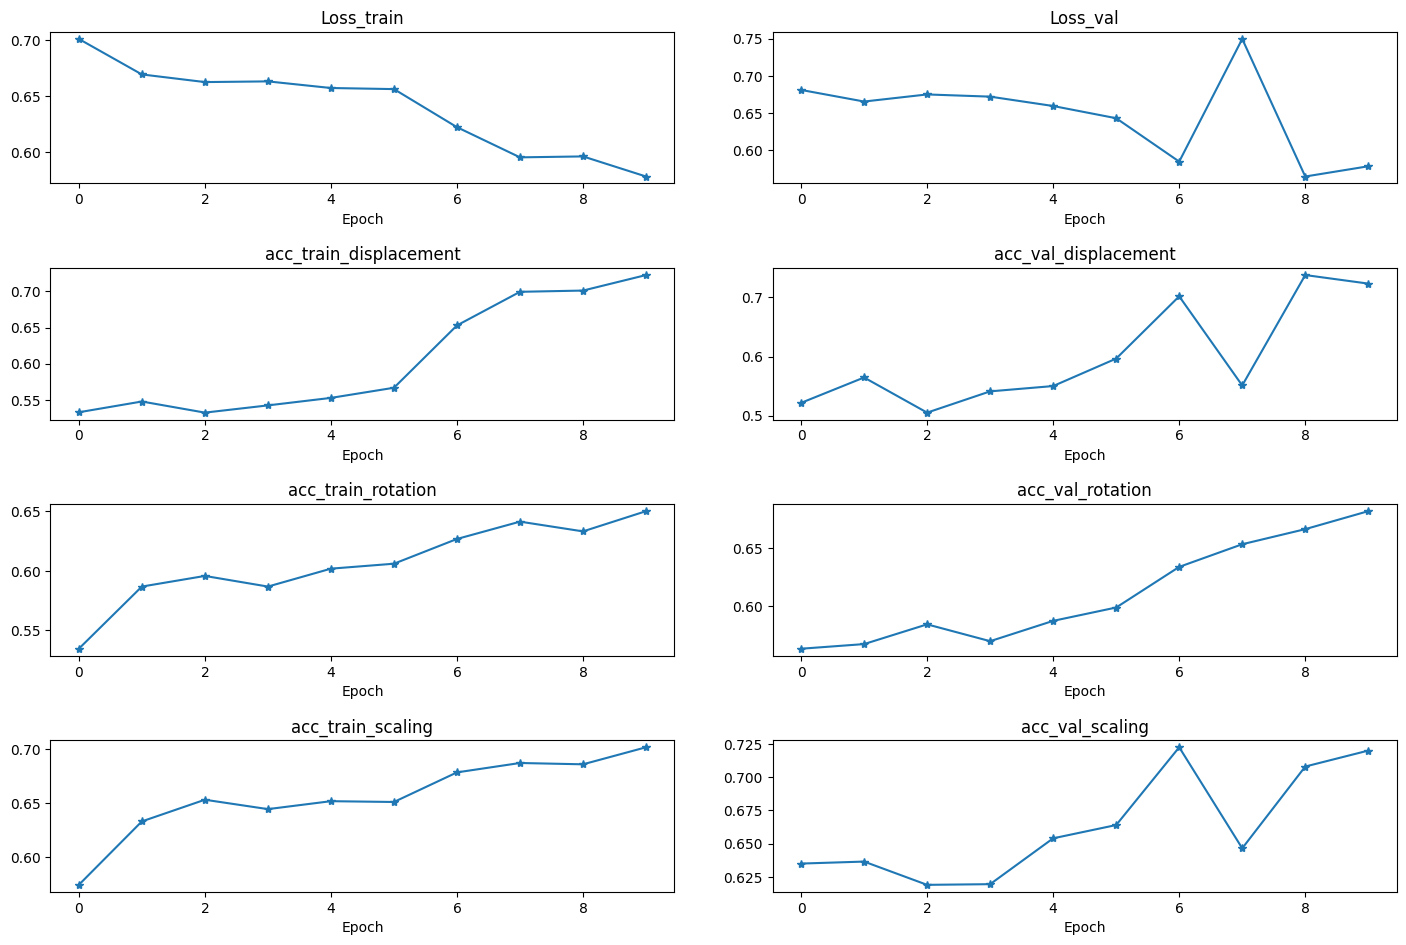

In [26]:
 import matplotlib.pyplot as plt
fig,axes = plt.subplots(4,2,figsize=(15,10))
fig.tight_layout(pad=4.0)
axes[0,0].plot(Loss_train,marker='*')
axes[0,0].set_title('Loss_train')
axes[0,0].set_xlabel('Epoch')
axes[0,1].plot(Loss_val,marker='*')
axes[0,1].set_title('Loss_val')
axes[0,1].set_xlabel('Epoch')

axes[1,0].plot(acc_train_dis,marker='*')
axes[1,0].set_title('acc_train_displacement')
axes[1,0].set_xlabel('Epoch')
axes[1,1].plot(acc_val_dis,marker='*')
axes[1,1].set_title('acc_val_displacement')
axes[1,1].set_xlabel('Epoch')

axes[2,0].plot(acc_train_rot,marker='*')
axes[2,0].set_title('acc_train_rotation')
axes[2,0].set_xlabel('Epoch')
axes[2,1].plot(acc_val_rot,marker='*')
axes[2,1].set_title('acc_val_rotation')
axes[2,1].set_xlabel('Epoch')

axes[3,0].plot(acc_train_scale,marker='*')
axes[3,0].set_title('acc_train_scaling')
axes[3,0].set_xlabel('Epoch')
axes[3,1].plot(acc_val_scale,marker='*')
axes[3,1].set_title('acc_val_scaling')
axes[3,1].set_xlabel('Epoch')

#Test


In [28]:
from google.colab import drive
drive.mount('/content/drive')
torch.save(best_model_wts, f'/content/drive/My Drive/model_wts.pth')

Mounted at /content/drive


In [29]:
model_loaded = model=changer(block,SpatialExchange,ChannelExchange,3).to(device)
model_loaded.load_state_dict(best_model_wts)

<All keys matched successfully>

### best saved model on checkpoint perfomance:

In [30]:
def log(phase,acc_dis, acc_rot, acc_scale,loss):
  print(f'loss_{phase} ={loss:.3f},acc_dis={acc_dis:.3f}, acc_rot={acc_rot:.3f},  acc_scale={acc_scale:.3f}')

from tqdm import tqdm
import copy


model_loaded.eval()
corr_val = 0
num_correct_test = 0
num_correct_dis_test = 0
num_correct_rot_test = 0
num_correct_scale_test = 0
running_loss = 0
total = 0
with torch.no_grad():
    for inputs, trans, targets in tqdm(test_loader):
        inputs = inputs.to(device).float()
        trans = trans.to(device).float()
        targets = targets.to(device).float()
        outputs = model_loaded(inputs,trans)
        loss = criterion(outputs, targets)
        running_loss+= loss.item()
        predicted = (outputs > 0.5).float()
        # num_correct_val += (predicted==targets).all(dim=1).int().sum().item()
        num_correct_dis_test += (predicted[:,0]==targets[:,0]).int().sum().item()
        num_correct_rot_test += (predicted[:,1]==targets[:,1]).int().sum().item()
        num_correct_scale_test +=  (predicted[:,2]==targets[:,2]).int().sum().item()
        total += inputs.size(0)
epoch_loss = running_loss/len(test_loader)
log('test',num_correct_dis_test/total, num_correct_rot_test/total, num_correct_scale_test/total,epoch_loss)

100%|██████████| 210/210 [02:49<00:00,  1.24it/s]

loss_test =0.538,acc_dis=0.754, acc_rot=0.658,  acc_scale=0.779


### with the last model in epoch 10:

In [27]:
def log(phase,acc_dis, acc_rot, acc_scale,loss):
  print(f'loss_{phase} ={loss:.3f},acc_dis={acc_dis:.3f}, acc_rot={acc_rot:.3f},  acc_scale={acc_scale:.3f}')

from tqdm import tqdm
import copy


model.eval()
corr_val = 0
num_correct_test = 0
num_correct_dis_test = 0
num_correct_rot_test = 0
num_correct_scale_test = 0
running_loss = 0
total = 0
with torch.no_grad():
    for inputs, trans, targets in tqdm(test_loader):
        inputs = inputs.to(device).float()
        trans = trans.to(device).float()
        targets = targets.to(device).float()
        outputs = model(inputs,trans)
        loss = criterion(outputs, targets)
        running_loss+= loss.item()
        predicted = (outputs > 0.5).float()
        # num_correct_val += (predicted==targets).all(dim=1).int().sum().item()
        num_correct_dis_test += (predicted[:,0]==targets[:,0]).int().sum().item()
        num_correct_rot_test += (predicted[:,1]==targets[:,1]).int().sum().item()
        num_correct_scale_test +=  (predicted[:,2]==targets[:,2]).int().sum().item()
        total += inputs.size(0)
epoch_loss = running_loss/len(test_loader)
log('test',num_correct_dis_test/total, num_correct_rot_test/total, num_correct_scale_test/total,epoch_loss)

100%|██████████| 210/210 [02:54<00:00,  1.21it/s]

loss_test =0.559,acc_dis=0.736, acc_rot=0.629,  acc_scale=0.781


سوال تئوری:
بررسی کنید عکس ها با یک ،2 یا 3 تغییر کدام بهتر تشخیص داده میشوند؟

with saved model on checkpoint perfomance:

In [33]:
def log(phase,acc_dis, acc_rot, acc_scale,loss):
  print(f'loss_{phase} ={loss:.3f},acc_dis={acc_dis:.3f}, acc_rot={acc_rot:.3f},  acc_scale={acc_scale:.3f}')

from tqdm import tqdm
import copy


model_loaded.eval()
corr_val = 0
num_correct_1 = 0
num_correct_2 = 0

total1 = 0
total2 = 0
with torch.no_grad():
    for inputs, trans, targets in tqdm(test_loader):
        inputs = inputs.to(device).float()
        trans = trans.to(device).float()
        targets = targets.to(device).float()
        outputs = model_loaded(inputs,trans)
        loss = criterion(outputs, targets)
        running_loss+= loss.item()
        predicted = (outputs > 0.5).float()
        for sample_out,sample_tar in zip(predicted,targets): # check model's perofmance on one change and two change
          if torch.count_nonzero(sample_tar).item()==1:
            num_correct_1+=(sample_out==sample_tar).all().int().item()
            total1+=1
          if torch.count_nonzero(sample_tar).item()==2:
            num_correct_2+=(sample_out==sample_tar).all().int().item()
            total2+=1



100%|██████████| 210/210 [02:49<00:00,  1.24it/s]


In [34]:
print(f'one chnages accuracy {num_correct_1/total1}')
print(f'two chnages accuracy {num_correct_2/total2}')

one chnages accuracy 0.6134831460674157
two chnages accuracy 0.07630878438331855


with lase model on epoch 10:

In [31]:
def log(phase,acc_dis, acc_rot, acc_scale,loss):
  print(f'loss_{phase} ={loss:.3f},acc_dis={acc_dis:.3f}, acc_rot={acc_rot:.3f},  acc_scale={acc_scale:.3f}')

from tqdm import tqdm
import copy


model.eval()
corr_val = 0
num_correct_1 = 0
num_correct_2 = 0

total1 = 0
total2 = 0
with torch.no_grad():
    for inputs, trans, targets in tqdm(test_loader):
        inputs = inputs.to(device).float()
        trans = trans.to(device).float()
        targets = targets.to(device).float()
        outputs = model(inputs,trans)
        loss = criterion(outputs, targets)
        running_loss+= loss.item()
        predicted = (outputs > 0.5).float()
        for sample_out,sample_tar in zip(predicted,targets): # check model's perofmance on one change and two change
          if torch.count_nonzero(sample_tar).item()==1:
            num_correct_1+=(sample_out==sample_tar).all().int().item()
            total1+=1
          if torch.count_nonzero(sample_tar).item()==2:
            num_correct_2+=(sample_out==sample_tar).all().int().item()
            total2+=1



100%|██████████| 210/210 [03:00<00:00,  1.16it/s]


In [32]:
print(f'one chnages accuracy {num_correct_1/total1}')
print(f'two chnages accuracy {num_correct_2/total2}')

one chnages accuracy 0.622093023255814
two chnages accuracy 0.10125448028673835


as you can see it is easier to detect fewer changes

In [ ]:
torch.count_nonzero(torch.tensor([1,2])).item()

2